In [24]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [25]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Check the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [26]:
# Check for null values and data types
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [27]:
# Check duplicates
print(customers.duplicated().sum()) 
print(products.duplicated().sum()) 
print(transactions.duplicated().sum())


0
0
0


In [28]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Preview the merged dataset
print(data.head())



  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

Exploratory Data Analysis

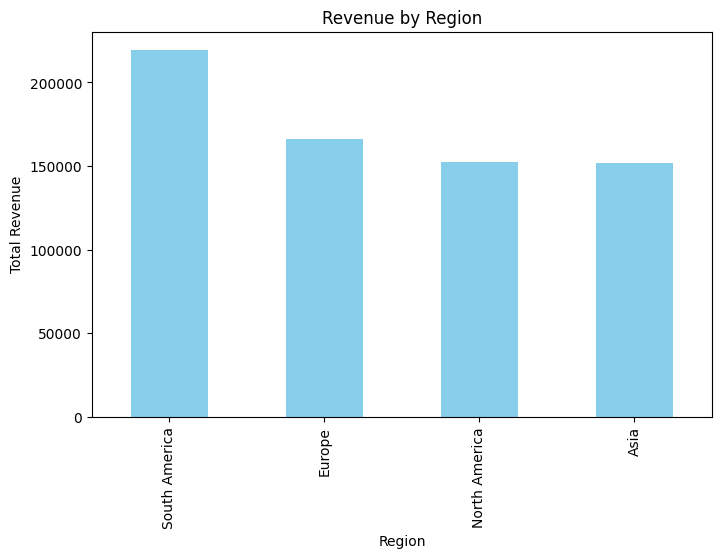

In [29]:
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# 1. Plot revenue by region
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()


Revenue Distribution by Region (bar chart):-

1. South America: Top revenue-generating region with over 200,000 USD,     showcasing strong market demand.
2. Europe: Second-largest contributor, with potential for growth through targeted campaigns.
3. North America and Asia: Generate similar revenue but lag behind South America, indicating untapped potential.
4. Regional Imbalance: Clear revenue disparity highlights the need for region-specific strategies to diversify revenue streams.
5. Strategic Focus: Prioritize South America’s high demand while boosting efforts in underperforming regions like North America and Asia for balanced growth.

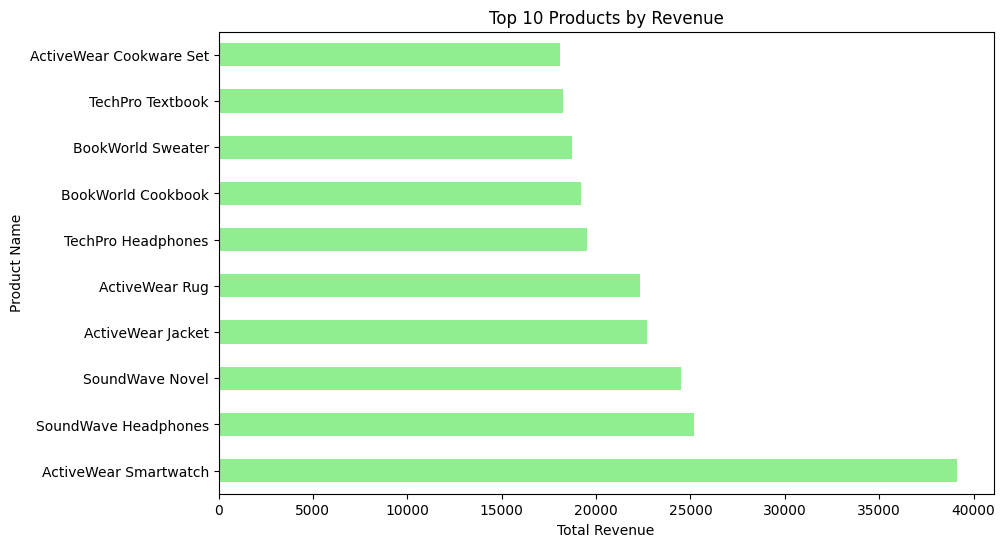

In [30]:
product_revenue = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# 2. Plot top 10 products by revenue
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()


Top 10 Products by Revenue (bar chart):-

1. ActiveWear Smartwatch generates the highest revenue, significantly outperforming other products.
2. SoundWave Headphones and SoundWave Novel are the next highest revenue generators.
3. ActiveWear products (Cookware Set, Rug, Jacket) consistently rank high in revenue.
4. BookWorld products (Sweater, Cookbook) also contribute significantly to revenue.
5. TechPro products (Textbook, Headphones) show moderate revenue generation.

C:\Users\kumar\AppData\Local\Temp\ipykernel_16136\998334897.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = data.set_index('TransactionDate').resample('M')['TotalValue'].sum()


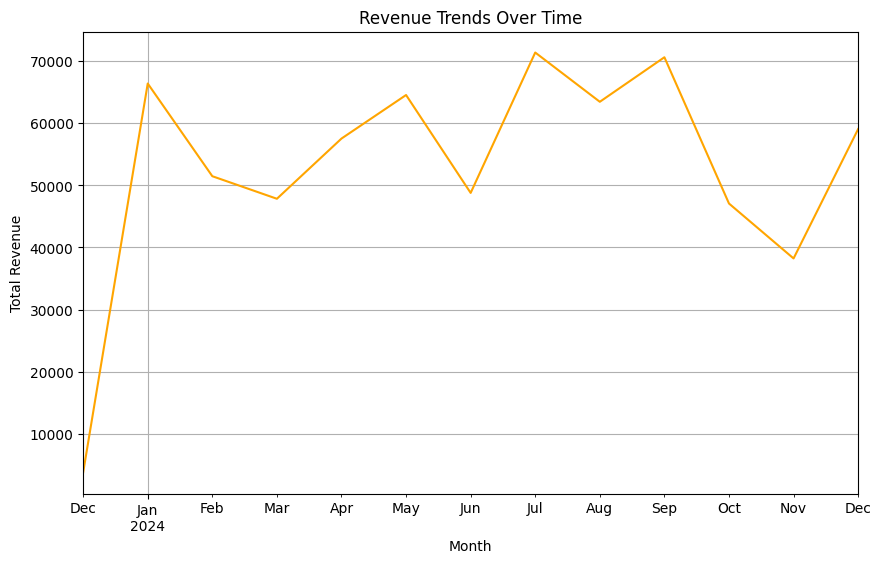

In [31]:
# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Group by month
monthly_revenue = data.set_index('TransactionDate').resample('M')['TotalValue'].sum()

# 3. Plot revenue trends
plt.figure(figsize=(10, 6))
monthly_revenue.plot(color='orange')
plt.title('Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


Revenue Trends Over Time (line graph) :-

1. Overall, revenue has increased over the year.
2. December 2023 saw a sharp revenue spike.
3. January 2024 revenue dropped significantly.
4. Revenue gradually increased from February through July.
5. July 2024 saw a peak in revenue.
6. Revenue declined in August and September.
7. A slight increase in revenue occurred in October.
8. November 2024 revenue dropped.
9. December 2024 revenue increased again.

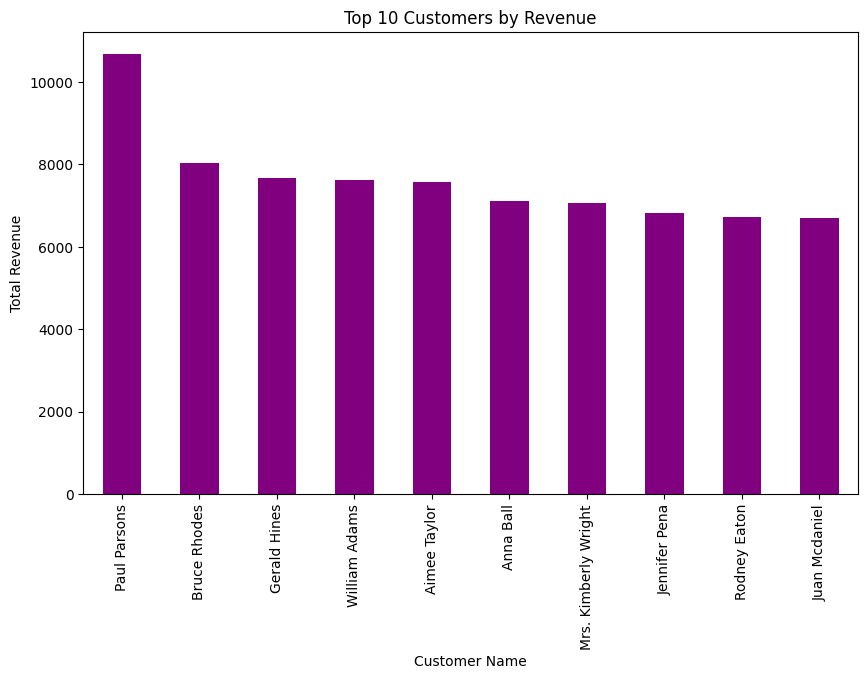

In [32]:
customer_revenue = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)

# 4. Top 10 customers by revenue
top_customers = customer_revenue.head(10)

# Plot
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.show()


Top 10 Customers by Revenue (bar chart):-

1. Paul Parsons is the highest-revenue-generating customer.
2. Revenue generated by top customers shows a significant drop-off after Paul Parsons.
3. The top 10 customers combined generate a substantial portion of total revenue.
4. Identifying and understanding the factors contributing to these customers' high revenue can be valuable for targeted marketing or customer retention strategies.

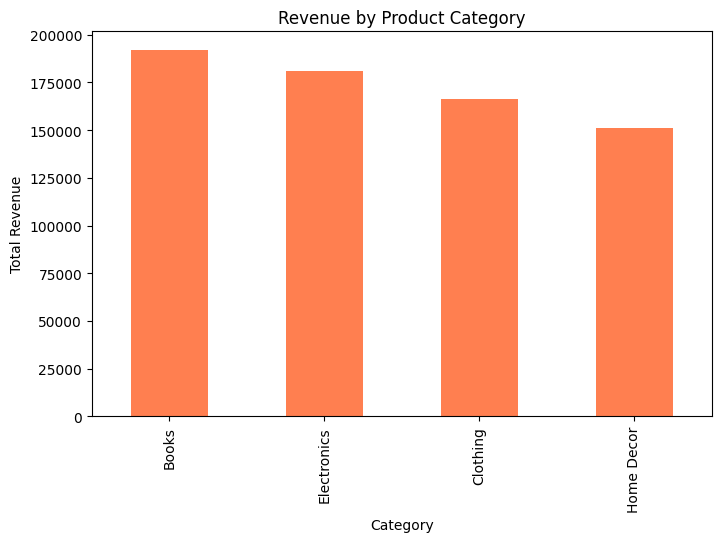

In [33]:

category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# 5. Plot revenue by category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()


Revenue by Product Category (bar chart):-

1. Books generate the highest revenue, followed closely by Electronics.
2. Clothing and Home Decor categories have similar, lower revenue levels.
3. Understanding the factors driving revenue differences in each category is crucial for optimizing product mix and marketing strategies.